# TEST PROJEKT1


## Dane i importy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
! pip install category_encoders

     |████████████████████████████████| 86 kB 3.1 MB/s 


In [3]:
import category_encoders as ce

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
!wget https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
df_raw = pd.read_csv('census_income_dataset.csv')

--2022-04-21 22:03:45--  https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
Resolving lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)... 52.217.101.252
Connecting to lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)|52.217.101.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5717107 (5.5M) [text/csv]
Saving to: ‘census_income_dataset.csv’

census_income_datas 100%[===================>]   5.45M  3.74MB/s    in 1.5s    

2022-04-21 22:03:47 (3.74 MB/s) - ‘census_income_dataset.csv’ saved [5717107/5717107]



In [6]:
y = df_raw['income_level']
del df_raw['income_level']

In [7]:
X_build, X_val, y_build, y_val = train_test_split(df_raw, y, test_size=0.2, random_state=500, stratify=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_build, y_build, test_size=0.2, random_state=500, stratify=y_build)

Teraz mamy df do trainu i df_test do testowania

## Preprocessing

In [9]:
woeEncoder = ce.WOEEncoder()

In [10]:
y_train = y_train.apply(lambda x: 1 if x=='>50K' else 0)

In [11]:
X_train['age'],bins = pd.qcut(X_train['age'], q = 10, labels=False, retbins=True)
X_train = X_train.astype({"age": str})
del X_train['education_num']
del X_train['fnlwgt']
X_train['capital_gain']=X_train['capital_gain'].apply(lambda x: "1" if x>0 else "2" )
X_train['capital_loss']=X_train['capital_loss'].apply(lambda x: "1" if x>0 else "2")
X_train['hours_per_week']=X_train['hours_per_week'].apply(lambda x: "1" if x>40 else ("2" if x==40 else "3"))
#del X_train['income_level']

In [12]:
y_test = y_test.apply(lambda x: 1 if x=='>50K' else 0)

In [13]:
bins

array([17., 22., 26., 30., 33., 37., 41., 45., 51., 58., 90.])

In [14]:
X_test['age'] = pd.cut(X_test['age'], bins=[0., 22., 26., 30., 33., 37., 41., 46., 51., 58., 100.], labels=False,)
X_test = X_test.astype({"age": str})
del X_test['education_num']
del X_test['fnlwgt']
X_test['capital_gain']=X_test['capital_gain'].apply(lambda x: "1" if x>0 else "2" )
X_test['capital_loss']=X_test['capital_loss'].apply(lambda x: "1" if x>0 else "2")
X_test['hours_per_week']=X_test['hours_per_week'].apply(lambda x: "1" if x>40 else ("2" if x==40 else "3"))
#del X_test['income_level']

In [15]:
X_ez = woeEncoder.fit_transform(X_train, y_train)

ZLaczenie bliskich WOE i znowu WOE

In [16]:
for col in X_ez.columns:
  X_ez[col] = round(X_ez[col],2)
  X_ez = X_ez.astype({col: str})

In [17]:
woeEncoder = ce.WOEEncoder()
X_ez = woeEncoder.fit_transform(X_ez, y_train)

Zakodowanie przy pomocy dictionaries

In [18]:
for col in X_test.columns:
  X_test[col] = X_test[col].map(dict(zip(X_train[col],X_ez[col])))


In [19]:
X_train.nunique()

age               10
workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
capital_gain       2
capital_loss       2
hours_per_week     3
native_country    42
dtype: int64

In [20]:
X_train.nunique()

age               10
workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
capital_gain       2
capital_loss       2
hours_per_week     3
native_country    42
dtype: int64

In [21]:
X_train.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
33927,2,Private,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Male,2,2,2,United-States
11872,4,Private,HS-grad,Separated,Adm-clerical,Unmarried,White,Female,1,2,3,United-States
34269,6,State-gov,Assoc-voc,Married-civ-spouse,Protective-serv,Husband,White,Male,2,2,1,United-States
29168,5,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,2,2,2,United-States
7987,2,Private,Some-college,Never-married,Machine-op-inspct,Not-in-family,White,Male,2,2,2,United-States


In [22]:
X_ez.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
33927,-0.586708,-0.122944,-0.275818,0.938695,-0.644110,-3.074009,0.07633,0.327258,-0.196463,-0.072022,-0.148115,0.020452
11872,0.302531,-0.122944,-0.515200,-1.399724,-0.644110,-1.584320,0.07633,-0.930171,1.631315,-0.072022,-1.114427,0.020452
34269,0.591473,0.248227,0.079427,0.938695,0.359995,0.946833,0.07633,0.327258,-0.196463,-0.072022,0.755635,0.020452
29168,0.483320,-0.122944,-0.515200,0.938695,-0.080783,0.946833,0.07633,0.327258,-0.196463,-0.072022,-0.148115,0.020452
7987,-0.586708,-0.122944,-0.275818,-1.852886,-0.841575,-1.003472,0.07633,0.327258,-0.196463,-0.072022,-0.148115,0.020452


In [23]:
X_test.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
36963,0.747833,-0.122944,1.348203,-1.852886,-0.841575,-1.003472,0.07633,0.327258,-0.196463,-0.072022,-0.148115,0.020452
39383,0.591473,-0.122944,1.348203,-1.852886,0.986621,-1.003472,0.07633,0.327258,-0.196463,-0.072022,-0.148115,-0.096242
18272,0.070128,-0.122944,2.139751,0.938695,0.986621,0.946833,0.07633,0.327258,-0.196463,-0.072022,-1.114427,0.020452
26474,-0.586708,-0.122944,-0.515200,-1.399724,-1.930533,-1.584320,0.07633,-0.930171,-0.196463,-0.072022,-1.114427,0.020452
19066,0.611153,0.248227,-0.515200,0.938695,-0.644110,0.946833,0.07633,0.327258,-0.196463,-0.072022,-0.148115,0.020452


## Modelowanie

Zaimportujmy niezbędne biblioteki.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### LogisticRegression

In [26]:
lr_base = LogisticRegression(random_state=42)
lr_base.fit(X_ez, y_train)
lr_base.score(X_ez,y_train)

0.8451276473222855

In [27]:
print(lr_base.score(X_ez,y_train), f1_score(lr_base.predict(X_test),y_test))

0.8451276473222855 0.6452953398634609


In [34]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-5, 3e-4]
}

lr_model = LogisticRegression(random_state=42)
grid = GridSearchCV(estimator = lr_model, param_grid = param_grid_lr, error_score=0.0,
                    cv = 5)

grid_result = grid.fit(X_ez, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.844936 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}


In [41]:
lr_best = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 10, tol = 0.001, random_state=42)
lr_best.fit(X_ez, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear',
                   tol=0.001)

In [30]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.8 MB/s 


In [36]:
from skopt import BayesSearchCV

opt = BayesSearchCV(
    LogisticRegression(),
    {
        'C': (0.0001, 10000),
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'tol': (1e-5, 10)
    },
    error_score = 0.0,
    n_iter=50, #generalnie powinno być więcej, ale wtedy długo trwa
    cv=5
)

opt.fit(X_ez, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("Best params: %s" % opt.best_params_)

val. score: 0.8448397917241751
test score: 0.8470889315419066
Best params: OrderedDict([('C', 4067.7906336938345), ('penalty', 'l2'), ('solver', 'saga'), ('tol', 1e-05)])


In [42]:
print(lr_best.score(X_ez,y_train), f1_score(lr_best.predict(X_ez),y_train), roc_auc_score(lr_best.predict(X_test),y_test), precision_score(lr_best.predict(X_test),y_test), recall_score(lr_best.predict(X_test),y_test))

0.8451916309424787 0.640463630284568 0.8008414681133602 0.5812834224598931 0.725634178905207


In [ ]:
X_test['native_country']

2218     0.022158
37566    0.022158
18158    0.022158
5592    -0.508487
14619    0.022158
           ...   
43185    0.022158
18339    0.022158
23803   -1.551530
20427    0.022158
19419    0.022158
Name: native_country, Length: 7815, dtype: float64

In [43]:
f1_score(lr_best.predict(X_test),y_test)

0.6454869358669835

z laczeniem 0.843891024569614 0.640234287001577 0.8007503940163941

bez laczenia woe 0.843891024569614 0.6400900900900901 0.8005549116235828

0.8435985291659702 0.6397837350754675 0.8004331706134287

0.843891024569614 0.6405405405405405 0.8008720101629819

In [ ]:
lr_test_xd = LogisticRegression(penalty = 'l2', solver = 'saga', C = 1, tol = 0.001, random_state=1, max_iter=1000)
lr_test_xd.fit(X_ez, y_train)
lr_test_xd.score(X_ez,y_train)

0.842136052147752

In [ ]:
from sklearn.preprocessing import StandardScaler
X_ez_scaler_applied = X_ez.copy()
scaler = StandardScaler()
X_ez_scaler_applied = scaler.fit_transform(X_ez_scaler_applied)

In [ ]:
lr_base2 = LogisticRegression(random_state=42)
lr_base2.fit(X_ez_scaler_applied, y_train)
lr_base2.score(X_ez_scaler_applied,y_train)

0.8420942670900886

In [ ]:
lr_model2 = LogisticRegression(random_state=42)
grid2 = GridSearchCV(estimator = lr_model, param_grid = param_grid_lr, error_score=0.0,
                    cv = 4, n_jobs = -1, verbose = 2)

grid_result2 = grid.fit(X_ez_scaler_applied, y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Fitting 4 folds for each of 280 candidates, totalling 1120 fits
Best: 0.842303 using {'C': 0.1, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}


### KNeighbours

In [ ]:
n_neighbors = [5, 7, 9, 11, 13, 15]
weights = ['uniform', 'distance']
metric = ['minkowski', 'euclidean', 'manhattan']
param_grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)

knn_model = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn_model, param_grid = param_grid,
                    cv = 3, n_jobs = -1, verbose = 2)

grid_result = grid.fit(X_ez, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best: 0.837498 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [ ]:
kn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'uniform')

### Random forest

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_ez, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best: 0.844392 using {'criterion': 'gini', 'max_depth': 80, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 1000}


In [ ]:
rf_best = RandomForestClassifier(criterion = 'gini', max_depth = 80, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 1000)

### XGBoost

In [ ]:
! pip install xgboost
import xgboost
from xgboost import XGBClassifier

In [ ]:
model=XGBClassifier()
model.fit(X_ez, y_train)
model.score(X_test,y_test)

0.8479087452471483

In [ ]:
param_grid_xgboost = {
    'max_depth': [8, 10, 12, 14, 16, 18, None],
    'learning_rate': [0.03, 0.1, 0.3, 0.001],
    'splitter': ["best", "random"],
    'max_features': ["auto", None]
}

xgboost = XGBClassifier(random_state = 42)
xgboost_grid = GridSearchCV(xgboost, param_grid_xgboost, cv = 2)
result = xgboost_grid.fit(X_ez, y_train)

Best: 0.844392 using {'criterion': 'gini', 'max_depth': 80, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 1000}


In [ ]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.842554 using {'learning_rate': 0.03, 'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}


In [ ]:
xgb_best = XGBClassifier(learning_rate = 0.03, max_depth = 8, max_features = 'auto', splitter = 'best')

### Podsumowanie

In [ ]:
test_results = []
for model, model_name in [(lr_best, "LogisticRegression"), (rf_best, "RandomForest"), (kn_best, "KNeighbors"), (xgb_best, "XGBoost")]:
    model.fit(X_ez, y_train)
    y_pred = model.predict(X_test)
    measures_results = {"model": model_name}
    for measure in [accuracy_score, f1_score, roc_auc_score]:
        measures_results[measure.__name__] = measure(y_test, y_pred)
    test_results.append(measures_results)
    
test_results_df = pd.DataFrame(test_results)

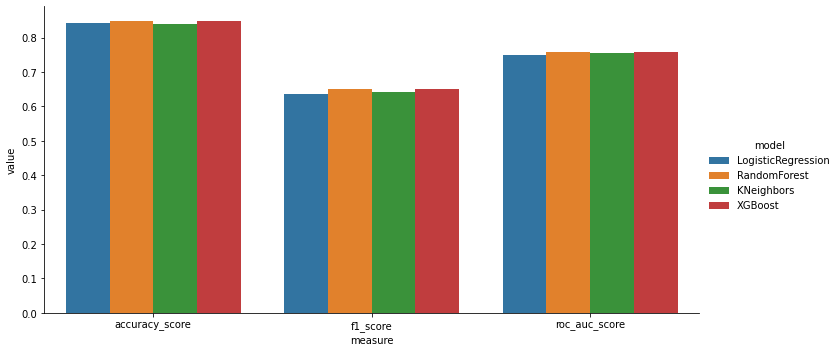

In [ ]:
test_results_df = pd.melt(test_results_df, id_vars="model", var_name="measure", value_name="value")
sns.catplot(x='measure', y='value', hue='model', data=test_results_df, kind='bar', aspect=2)
plt.show()

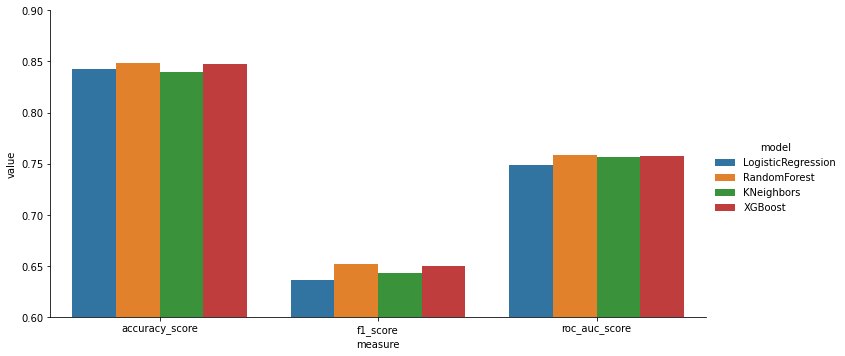

In [ ]:
sns.catplot(x='measure', y='value', hue='model', data=test_results_df, kind='bar', aspect=2)
plt.ylim(0.60, 0.9)
plt.show()